[View in Colaboratory](https://colab.research.google.com/github/paruliansaragi/cnn-fastai/blob/master/fastai_california.ipynb)

In [0]:
!pip install kaggle

In [2]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!pip install fastai

In [0]:
#connect to api
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#!kaggle competitions download -c titanic

In [0]:
PATH = './sample_data'

In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [0]:
df_raw = pd.read_csv(f'sample_data/california_housing_train.csv')

In [12]:
df_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [14]:
df_raw.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [0]:
df, y, nas = proc_df(df_raw, 'median_house_value')

In [16]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df, y)

0.9668196148110543

In [26]:
y.shape
df.shape

(17000, 8)

In [17]:
len(df)

17000

In [0]:
df_test = pd.read_csv('sample_data/california_housing_test.csv')

In [0]:
df_test, y_test, nas_test = proc_df(df_test, 'median_house_value')

In [21]:
df_test.shape

(3000, 8)

In [22]:
df_raw.shape

(17000, 9)

In [23]:
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375


In [33]:
def split_vals(a, n): return a[:n].copy(), a[n:].copy()

n_valid = 5000
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)
X_train.shape, y_train.shape, X_valid.shape

((12000, 8), (12000,), (5000, 8))

In [34]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(X_train), y_train),
           rmse(m.predict(X_valid), y_valid),
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1.13 s, sys: 6.85 ms, total: 1.14 s
Wall time: 713 ms
[20876.511396742433, 98852.9342302613, 0.9651645171713922, 0.3488941891180225]


In [25]:
y_test.shape

(3000,)

In [0]:
m.predict(df, y_test)

In [35]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([207800.,  78700.,  99100.,  88200.,  88200., 240800.,  99100., 220100., 207800.,  88200.]),
 141800.0,
 126200.0)

In [36]:
preds.shape

(10, 5000)

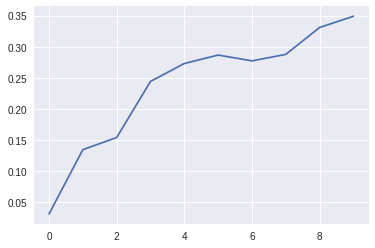

In [37]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [38]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[18626.43276230275, 104194.65706376758, 0.9722690109980946, 0.27662525767158264]
